# Flood susceptibility

In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# random seeding
r_seed = 11
np.random.seed(r_seed)
random.seed(r_seed)

# warning hiding
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

# plots type
%matplotlib inline

In [2]:
data_url = r'./data/Data.xlsx'
data_egypt = pd.read_excel(data_url, sheet_name='Egypt')
data_vietnam = pd.read_excel(data_url, sheet_name='Vietnam')
data_algeria = pd.read_excel(data_url, sheet_name='Algeria')

In [3]:
DATA = data_vietnam

### Data Insights

In [4]:
DATA

,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
0,0,273.673553,5394,-1.181288,1262.251709,6764,3,1997.939575,517.424927,225,39.400539,73.926514,4.983013
1,0,87.612595,6959,0.198808,30.803158,4854,0,664.264038,23.386223,176,1.799770,0.000000,6.830124
2,0,145.130341,6924,1.576899,63.163097,6376,0,2055.807617,60.674355,89,24.735586,0.000000,4.174054
3,0,305.356903,6994,0.439474,30.838863,5035,0,4933.160156,21.388062,185,1.614745,0.000000,6.935140
4,0,211.153061,6970,-3.486925,557.386658,7271,7,30.000000,0.345276,156,19.218348,73.203819,6.531634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1,62.555756,6845,0.042296,8.231409,3943,0,773.969604,3.131248,179,0.594140,0.000000,7.877984
1671,1,62.223362,6967,-0.035348,251.308929,4555,5,2160.366455,241.783585,134,27.808634,79.113358,5.830816
1672,1,324.534515,6855,-0.005932,7.734446,4244,0,6953.821777,5.082704,181,0.294712,0.000000,8.493532
1673,1,118.385002,6872,-0.048692,10.976943,3457,1,1589.116821,8.394401,176,1.222182,0.640019,7.895991


In [5]:
DATA.describe()

,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,0.493731,173.909603,6629.604776,0.125585,298.884694,5488.811940,68.156418,2382.938856,179.304976,174.817313,9.654919,133.546706,7.473611
std,0.500110,108.644832,376.502427,0.855580,432.444774,1939.130588,1326.725104,2003.148568,254.379430,33.365219,11.522211,2922.939273,2.483840
min,0.000000,-1.000000,5155.000000,-5.247857,-3.016160,-2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.505941
25%,0.000000,77.966953,6455.000000,-0.050069,4.537584,4001.000000,0.000000,816.837585,1.740580,175.000000,0.427123,0.000000,5.425692
50%,0.000000,172.470657,6770.000000,0.008038,20.827703,5018.000000,1.000000,1839.777588,12.356081,180.000000,2.486717,0.174097,7.283823
75%,1.000000,270.082687,6876.000000,0.284697,548.668823,7377.500000,3.000000,3504.153442,325.367874,183.000000,18.474319,13.125132,8.896593
max,1.000000,359.989441,7417.000000,4.279504,2331.024170,9837.000000,49301.000000,11105.732422,1471.843262,254.000000,49.899712,117852.890620,19.250879


### Data Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
Nr = MinMaxScaler()

DATA_N = DATA.drop('Flood', axis=1)
DATA_N = Nr.fit_transform(DATA_N)
DATA_N = pd.DataFrame(DATA_N, columns=DATA.columns[1:])

DATA_N['Flood'] = DATA['Flood']
DATA_N.head()

,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI,Flood
0,0.760891,0.105659,0.426831,0.542093,0.740390,0.000061,0.179902,0.351549,0.885827,0.789595,0.000627,0.093812,0
1,0.245471,0.797524,0.571687,0.014490,0.579032,0.000000,0.059813,0.015889,0.692913,0.036068,0.000000,0.211127,0
2,0.404805,0.782051,0.716332,0.028354,0.707612,0.000000,0.185112,0.041223,0.350394,0.495706,0.000000,0.042433,0
3,0.848659,0.812997,0.596947,0.014505,0.594323,0.000000,0.444199,0.014531,0.728346,0.032360,0.000000,0.217797,0
4,0.587699,0.802387,0.184829,0.240100,0.783222,0.000142,0.002701,0.000235,0.614173,0.385139,0.000621,0.192169,0


### Dimension Reduction with PCA

<AxesSubplot:>

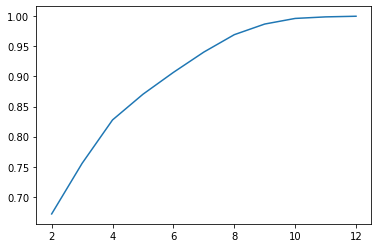

In [7]:
from sklearn.decomposition import PCA

DATA_PCA = DATA_N.drop('Flood', axis=1)

variance_ratio = {}
for n in range(2, DATA_PCA.shape[1]+1):
    pca = PCA(n_components=n)
    cr_pca = pca.fit(DATA_PCA)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)

pd.Series(variance_ratio).plot()

In [8]:
pca = PCA(n_components=7)
DATA_R = pca.fit_transform(DATA_PCA)
DATA_R = pd.DataFrame(
  DATA_R,
  columns=[f'PC-{i+1}' for i in range(DATA_R.shape[1])]
)
DATA_R['Flood'] = DATA['Flood']

print(f'{DATA_R.shape[0]}x{DATA_R.shape[1]}')
DATA_R.head()

1675x8


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,Flood
0,0.802366,-0.195437,0.504978,0.058703,-0.122475,-0.056130,0.070803,0
1,-0.289582,0.183390,-0.049650,-0.152589,-0.039158,-0.049346,0.046750,0
2,0.165355,0.137061,-0.137477,-0.391972,0.135719,0.264164,0.001705,0
3,-0.101290,-0.380055,-0.282911,0.117654,-0.014684,0.118189,0.004730,0
4,0.107638,-0.087185,0.048656,-0.269971,0.135573,-0.118984,-0.228226,0


### Splitting Positive and Negative classes

In [9]:
[(_, DATA_NEG), (_, DATA_POS)] = DATA_R.groupby('Flood')

DATA_POS, DATA_NEG = pd.DataFrame(DATA_POS), pd.DataFrame(DATA_NEG)

DATA_NEG_X = DATA_NEG.drop('Flood', axis=1)
DATA_NEG_Y = DATA_NEG['Flood']

DATA_POS_X = DATA_POS.drop('Flood', axis=1)
DATA_POS_Y = DATA_POS['Flood']

DATA_POS

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,Flood
594,-0.488004,0.113202,0.078226,0.089001,0.142329,-0.156529,-0.094997,1
595,-0.351695,0.142470,0.118363,0.011482,-0.011748,-0.019185,-0.014348,1
596,-0.507200,0.438127,0.212330,0.182888,0.043843,-0.161338,-0.262886,1
597,-0.245913,0.041021,-0.155450,0.200018,-0.018053,0.056806,-0.108319,1
598,-0.248215,-0.186935,0.102888,-0.059360,0.015777,0.051856,0.096787,1
...,...,...,...,...,...,...,...,...
1670,-0.358827,0.246089,-0.001973,-0.081292,-0.023535,-0.046443,0.072068,1
1671,0.151816,0.343137,-0.105852,-0.256396,0.155504,0.032928,0.098111,1
1672,-0.109920,-0.416229,-0.318634,0.320652,0.033333,0.199860,-0.015795,1
1673,-0.322164,0.102690,-0.047130,-0.028388,0.025412,-0.005732,0.087880,1


### Decomposition of Negative Class

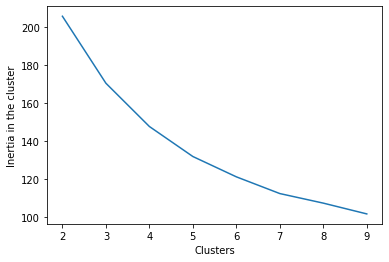

In [10]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(DATA_NEG_X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [11]:
KM = KMeans(n_clusters=2)
KM.fit(DATA_NEG_X)

CLASSES_NEG = []
labels = KM.labels_
for label in labels:
    CLASSES_NEG.append(label)

len(CLASSES_NEG)

848

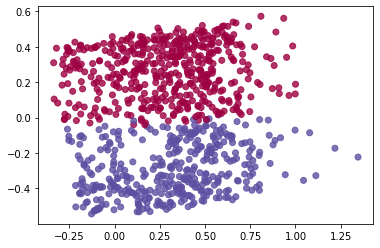

In [12]:
plt.scatter(DATA_NEG_X['PC-1'], DATA_NEG_X['PC-2'],
            c=CLASSES_NEG, cmap="Spectral", alpha=0.8)
plt.show()

### Decomposition of Positive Class

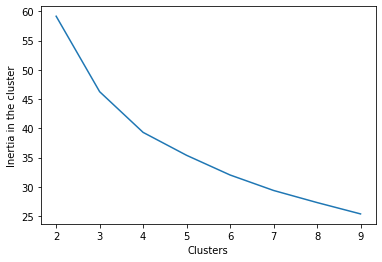

In [13]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(DATA_POS_X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [14]:
KM = KMeans(n_clusters=2)
KM.fit(DATA_POS_X)

CLASSES_POS = []
labels = KM.labels_
for label in labels:
    CLASSES_POS.append(label + max(CLASSES_NEG) + 1)

len(CLASSES_POS)

827

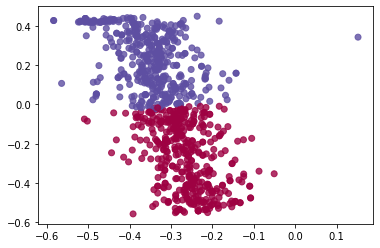

In [15]:
plt.scatter(DATA_POS_X['PC-1'], DATA_POS_X['PC-2'],
            c=CLASSES_POS, cmap="Spectral", alpha=0.8)
plt.show()

### Reconstructing Dataset

In [16]:
DATA_POS['Flood'] = CLASSES_POS
DATA_NEG['Flood'] = CLASSES_NEG

CLASSES = pd.concat([DATA_NEG['Flood'], DATA_POS['Flood']])

DATA_D = DATA_R.copy()
DATA_D['Flood'] = CLASSES

print(DATA_D['Flood'].value_counts())

0    472
2    417
3    410
1    376
Name: Flood, dtype: int64


### Algorithms Evaluation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA_D_NP = DATA_D.to_numpy()
train_x, test_x, train_y, test_y = train_test_split(
    DATA_D_NP[:, :-1], DATA_D_NP[:, -1], test_size=0.3
)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [
  (
    'KNN',
    'Nearest Neighbors',
    KNeighborsClassifier(5)
  ),
  (
    'ANN',
    'Neural network (MLP)',
    MLPClassifier(
      hidden_layer_sizes=(DATA_D.shape[1], DATA_D['Flood'].max() + 1),
      solver='adam',
      batch_size=64,
      max_iter=1000,
      alpha=1e-5,
    )
  ),
  (
    'L SVM',
    'Linear SVM',
    SVC(kernel='linear', C=0.025)
  ),
  (
    'RBF SVM',
    'Radial Basis SVM',
    SVC(gamma=2, C=1)
  ),
  (
    'GP',
    'Gaussian Process',
    GaussianProcessClassifier(1.0 * RBF(1.0))
  ),
  (
    'DT',
    'Decision Tree',
    DecisionTreeClassifier(max_depth=5)
  ),
  (
    'RF',
    'Random Forest',
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
  )
]

results = []
for short_name, name, model in classifiers:
  model.fit(train_x, train_y)
  pred_y = model.predict(test_x)

  results.append({
    'short_name': short_name,
    'name': name,
    'model': model,
    'ACC': metrics.accuracy_score(test_y, pred_y),
    'RMSE': metrics.mean_squared_error(test_y, pred_y),
    'MAE': metrics.mean_absolute_error(test_y, pred_y),
    'R2': metrics.r2_score(test_y, pred_y),
    'C_MAT': metrics.confusion_matrix(test_y, pred_y),
  })


### Results

In [19]:
def process_result(x):
  if x.name in ['name', 'short_name']:
    return x
  elif x.name == 'ACC':
    return x.apply(lambda x: f'{(x * 100):.2f}%')
  else:
    return x.apply(lambda x: f'{x:.4f}')

results_df = pd.DataFrame(results)
results_df = results_df.drop(['model', 'C_MAT'], axis=1)
results_df = results_df.apply(process_result)

results_df

,short_name,name,ACC,RMSE,MAE,R2
0,KNN,Nearest Neighbors,93.04%,0.2207,0.1093,0.8264
1,ANN,Neural network (MLP),95.03%,0.1769,0.0815,0.8608
2,L SVM,Linear SVM,87.48%,0.5189,0.2247,0.5917
3,RBF SVM,Radial Basis SVM,94.43%,0.1909,0.0915,0.8498
4,GP,Gaussian Process,95.63%,0.1093,0.0616,0.9140
5,DT,Decision Tree,96.22%,0.1292,0.0616,0.8983
6,RF,Random Forest,92.05%,0.2604,0.1252,0.7951


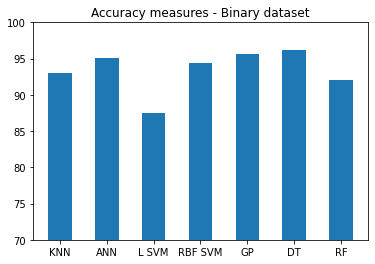

In [20]:
plt.bar(
  results_df['short_name'], 
  results_df['ACC'].apply(lambda x: float(x[:-1])),
  width=0.5
)
plt.title('Accuracy measures - Binary dataset')
plt.ylim(70, 100)
plt.show()

In [21]:
# import docx

# doc = docx.Document('t.docx')

# # add a table to the end and create a reference variable
# # extra row is so we can add the header row
# t = doc.add_table(results_df.shape[0]+1, results_df.shape[1])

# # add the header rows.
# for j in range(results_df.shape[-1]):
#     t.cell(0, j).text = results_df.columns[j]

# # add the rest of the data frame
# for i in range(results_df.shape[0]):
#     for j in range(results_df.shape[-1]):
#         t.cell(i+1, j).text = str(results_df.values[i, j])

# # save the doc
# doc.save('t.docx')


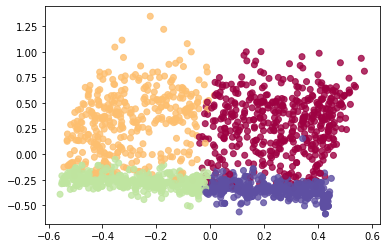

In [31]:
plt.scatter(DATA_D['PC-2'], DATA_D['PC-1'],
            c=DATA_D['Flood'], cmap="Spectral", alpha=0.8)
plt.show()